In [394]:
import json
import csv 
import pandas as pd

In [395]:
df = pd.read_csv("owid_covid_data.csv")
print(df.columns.tolist())

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [396]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [397]:
to_drop = ['continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million']
df.drop(to_drop, inplace=True, axis=1)

In [398]:
df = df.dropna()
df.head()

iso_code  new_cases_smoothed_per_million
5      AFG                           0.018
6      AFG                           0.018
7      AFG                           0.000
8      AFG                           0.000
9      AFG                           0.000

In [399]:
ITA = df[df["iso_code"] == "ITA"]
ITA = ITA.iloc[145:, :]
ITA = ITA.reset_index()

GRC = df[df["iso_code"] == "GRC"]
GRC = GRC.iloc[119:, :]
GRC = GRC.reset_index()

GBR = df[df["iso_code"] == "GBR"]
GBR = GBR.iloc[144:, :]
GBR = GBR.reset_index()

SWE = df[df["iso_code"] == "SWE"]
SWE = SWE.iloc[144:, :]
SWE = SWE.reset_index()

ISL = df[df["iso_code"] == "ISL"]
ISL = ISL.iloc[117:, :]
ISL = ISL.reset_index()

print(ITA.describe())
print(GRC.describe())
print(GBR.describe())
print(SWE.describe())
print(ISL.describe())



              index  new_cases_smoothed_per_million
count    597.000000                      597.000000
mean   74171.000000                      327.356313
std      172.483333                      602.725775
min    73873.000000                        2.894000
25%    74022.000000                       41.794000
50%    74171.000000                      133.714000
75%    74320.000000                      282.811000
max    74469.000000                     3011.915000
              index  new_cases_smoothed_per_million
count    597.000000                      597.000000
mean   58656.000000                      348.663325
std      172.483333                      587.235466
min    58358.000000                        1.419000
25%    58507.000000                       59.908000
50%    58656.000000                      201.308000
75%    58805.000000                      279.688000
max    58954.000000                     3493.287000
               index  new_cases_smoothed_per_million
count     5

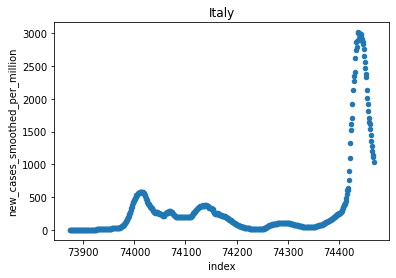

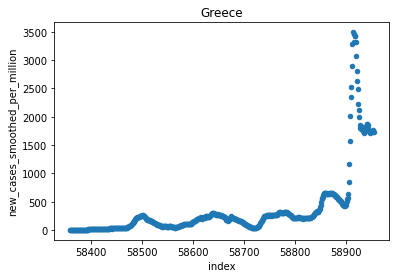

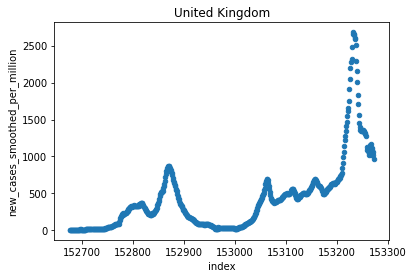

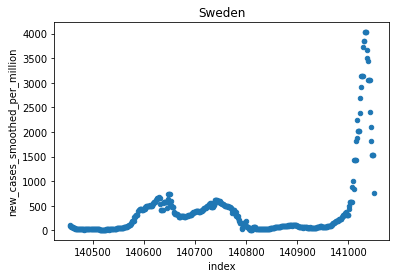

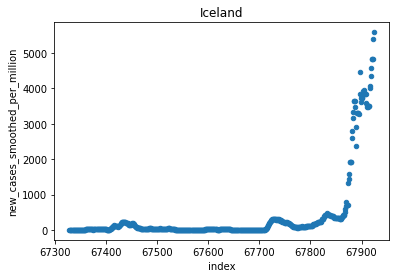

In [400]:
ITAplot = ITA.plot.scatter(y='new_cases_smoothed_per_million', x='index', title="Italy")

GRCplot = GRC.plot.scatter(y='new_cases_smoothed_per_million', x='index', title="Greece")
GBRplot = GBR.plot.scatter(y='new_cases_smoothed_per_million', x='index', title="United Kingdom")
SWEplot = SWE.plot.scatter(y='new_cases_smoothed_per_million', x='index', title="Sweden")
ISLplot = ISL.plot.scatter(y='new_cases_smoothed_per_million', x='index', title="Iceland")


In [401]:
df = pd.read_csv("owid_covid_data.csv")
print(df.columns.tolist())

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [402]:
# GBR = GBR.drop('index',axis=1)
# USA = USA.drop('index',axis=1)
# KOR = KOR.drop('index',axis=1)

# USA = USA.rename(columns={"new_cases_smoothed_per_million":"USA_NC"})
# GBR = GBR.rename(columns={"new_cases_smoothed_per_million":"GBR_NC"})
# KOR = KOR.rename(columns={"new_cases_smoothed_per_million":"KOR_NC"})

# USA_GBR = pd.concat([USA, GBR], axis=1, join="inner")
# USA_GBR.drop(['iso_code'], inplace=True, axis=1)

# USA_KOR = pd.concat([USA, KOR], axis=1, join="inner")
# USA_KOR.drop(['iso_code'], inplace=True, axis=1)

# USA_KOR.head()

ITA = ITA.rename(columns={"new_cases_smoothed_per_million":"ITA_NC"})
GRC = GRC.rename(columns={"new_cases_smoothed_per_million":"GRC_NC"})
GBR = GBR.rename(columns={"new_cases_smoothed_per_million":"GBR_NC"})
SWE = SWE.rename(columns={"new_cases_smoothed_per_million":"SWE_NC"})
ISL = ISL.rename(columns={"new_cases_smoothed_per_million":"ISL_NC"})

ITA_GRC = pd.concat([ITA, GRC], axis=1, join="inner")
ITA_GRC.drop(['iso_code'], inplace=True, axis=1)

ITA_GBR = pd.concat([ITA, GBR], axis=1, join="inner")
ITA_GBR.drop(['iso_code'], inplace=True, axis=1)

ITA_SWE = pd.concat([ITA, SWE], axis=1, join="inner")
ITA_SWE.drop(['iso_code'], inplace=True, axis=1)

ITA_ISL = pd.concat([ITA, ISL], axis=1, join="inner")
ITA_ISL.drop(['iso_code'], inplace=True, axis=1)


In [403]:
ITA_GRC.describe()

index       ITA_NC         index       GRC_NC
count    597.000000   597.000000    597.000000   597.000000
mean   74171.000000   327.356313  58656.000000   348.663325
std      172.483333   602.725775    172.483333   587.235466
min    73873.000000     2.894000  58358.000000     1.419000
25%    74022.000000    41.794000  58507.000000    59.908000
50%    74171.000000   133.714000  58656.000000   201.308000
75%    74320.000000   282.811000  58805.000000   279.688000
max    74469.000000  3011.915000  58954.000000  3493.287000

In [404]:
ITA_GRC.to_csv('ita_grc_effective_cases.csv',index=False)
ITA_GBR.to_csv('ita_gbr_effective_cases.csv',index=False)
ITA_SWE.to_csv('ita_swe_effective_cases.csv',index=False)
ITA_ISL.to_csv('ita_isl_effective_cases.csv',index=False)

In [405]:
## MI calculated in MCalcPart1b.m
# over all MI - 0.2033 bits
# over all 

# US GBR 
#First 150 0.6877 bits
#Middle 150  0.0885 bits 


# US KOR 
#First 150 0.1482 bits
#Middle 150  0.0889 bits

#for Entropy calculation (pdfs)
#USA_GBR['diff'] = abs(USA_GBR['USA_RR'] - USA_GBR['GBR_RR'])
#USA_KOR['diff'] = abs(USA_KOR['USA_RR'] - USA_KOR['KOR_RR'])
#USA_KOR.head()


#USAGBR_USAKOR_DIFF = pd.concat([USA_GBR['diff'], USA_KOR['diff']], axis=1, join="inner")
#USAGBR_USAKOR_DIFF = USAGBR_USAKOR_DIFF.T
#USAGBR_USAKOR_DIFF.head()